In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [25]:
dataset = pd.read_csv("Thyroid_Diff.csv")
X = dataset.drop("Recurred", axis=1)
y = dataset["Recurred"]

In [26]:
from sklearn.preprocessing import LabelEncoder
label_encode_cols = ['Risk', 'T', 'N', 'M', 'Stage', 'Response']
le = LabelEncoder()
for col in label_encode_cols:
    X[col] = le.fit_transform(X[col])

In [27]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
assert isinstance(X, pd.DataFrame)
onehot_encode_cols = ['Gender','Smoking','Hx Smoking','Hx Radiothreapy',
                      'Thyroid Function','Physical Examination','Adenopathy',
                      'Pathology','Focality']
ct = ColumnTransformer(
    transformers=[('encoder', OneHotEncoder(drop='if_binary'), onehot_encode_cols)],
    remainder='passthrough'
)
X_transformed = ct.fit_transform(X)
# Get new column names
encoded_cols = ct.named_transformers_['encoder'].get_feature_names_out(onehot_encode_cols)
remaining_cols = [col for col in X.columns if col not in onehot_encode_cols]
all_cols = list(encoded_cols) + remaining_cols

# Convert to DataFrame with proper column names
X_df = pd.DataFrame(X_transformed, columns=all_cols)

In [28]:
y_encoded = LabelEncoder().fit_transform(y)
print(y_encoded)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_df, y_encoded, random_state=0,test_size=0.2) 

In [30]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [31]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]]


In [32]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)
print(classification_report(y_test, y_pred))

[[50  1]
 [ 2 24]]
              precision    recall  f1-score   support

           0       0.96      0.98      0.97        51
           1       0.96      0.92      0.94        26

    accuracy                           0.96        77
   macro avg       0.96      0.95      0.96        77
weighted avg       0.96      0.96      0.96        77



In [33]:
from sklearn.model_selection import GridSearchCV

In [34]:
param_grid = {
    'n_estimators': [100, 200],           # Number of trees
    'max_depth': [10, 20, None],          # Max depth of each tree
    'min_samples_split': [2, 5],          # Min samples required to split a node
    'min_samples_leaf': [1, 2],           # Min samples at a leaf node
    'bootstrap': [True, False]            # Whether bootstrap samples are used
}
grid_search = GridSearchCV(classifier, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Print best params and score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

# Evaluate on test set
best_model = grid_search.best_estimator_
print(best_model)
y_pred = best_model.predict(X_test)
print(classification_report(y_test, y_pred))

Best Parameters: {'bootstrap': False, 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Best Cross-Validation Accuracy: 0.9739291380222106
RandomForestClassifier(bootstrap=False, criterion='entropy', max_depth=10,
                       min_samples_split=5, n_estimators=200, random_state=0)
              precision    recall  f1-score   support

           0       0.94      0.98      0.96        51
           1       0.96      0.88      0.92        26

    accuracy                           0.95        77
   macro avg       0.95      0.93      0.94        77
weighted avg       0.95      0.95      0.95        77



WITH ADDITIONAL PARAMETERS

In [35]:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True],
    'max_features': ['sqrt', 'log2'],
    'criterion': ['gini', 'entropy'],
    'class_weight': ['balanced', None],
    'oob_score': [True],
}
grid_search = GridSearchCV(classifier, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Print best params and score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

# Evaluate on test set
best_model = grid_search.best_estimator_
print(best_model)
y_pred = best_model.predict(X_test)
print(classification_report(y_test, y_pred))

Best Parameters: {'bootstrap': True, 'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200, 'oob_score': True}
Best Cross-Validation Accuracy: 0.9739291380222106
RandomForestClassifier(class_weight='balanced', max_depth=10,
                       min_samples_split=5, n_estimators=200, oob_score=True,
                       random_state=0)
              precision    recall  f1-score   support

           0       0.96      0.98      0.97        51
           1       0.96      0.92      0.94        26

    accuracy                           0.96        77
   macro avg       0.96      0.95      0.96        77
weighted avg       0.96      0.96      0.96        77



In [36]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('Accuracy is: ', accuracy_score(y_test, y_pred))
print('Precision is: ', precision_score(y_test, y_pred, average='weighted'))    
print('Recall is: ', recall_score(y_test, y_pred, average='weighted'))
print('F1-score is: ', f1_score(y_test, y_pred, average='weighted'))

Accuracy is:  0.961038961038961
Precision is:  0.9610189810189811
Recall is:  0.961038961038961
F1-score is:  0.9608461213258472


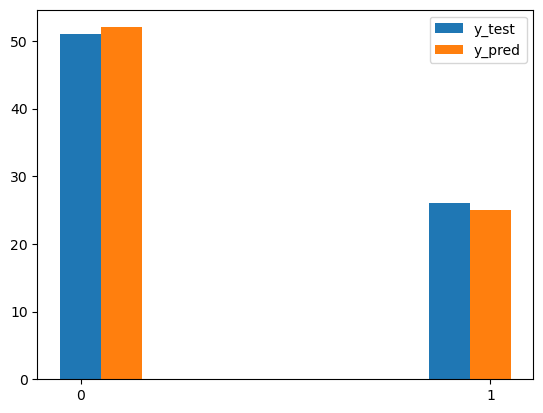

In [37]:
def plot_results(y_test, y_pred):
    fig = plt.figure()
    plt.hist(y_test, align='left')
    plt.hist(y_pred, align='right')
    plt.legend(['y_test', 'y_pred'])
    plt.xticks((0, 1))
    plt.show()
plot_results(y_test, y_pred)